In [1]:
import numpy as np
import scipy.stats as sp
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm, ticker
%matplotlib inline

In [7]:
def p(x,mu,sigma):
    return sp.multivariate_normal.pdf(x, mean=mu, cov=sigma)

def g(d, t, r, u, a, b, x):
    if d >= 0:
        P = np.array([[1, 0], [0, 1]])
    else:
        P = np.array([[1, 0], [0, -1]])
    S = np.array([[r*np.cos(t) + u*np.sin(t)/r, u*np.cos(t)/r - r*np.sin(t)],[np.sin(t)/r, np.cos(t)/r]])
    M = np.matmul(P, S)*np.sqrt(np.absolute(d))
    return np.matmul(x, M) + np.array([a, b])

mu = np.array([0, 0])
sigma = np.array([[1, 0], [0, 2]])

def h(d, t, r, u, a, b, x):
    if d >= 0:
        P = np.array([[1, 0], [0, 1]])
    else:
        P = np.array([[1, 0], [0, -1]])
    S = np.array([[r*np.cos(t) + u*np.sin(t)/r, u*np.cos(t)/r - r*np.sin(t)],[np.sin(t)/r, np.cos(t)/r]])
    M = np.matmul(P, S)*np.sqrt(np.absolute(d))
               
    p0 = p(x, mu, sigma)
    p1 = p(x, np.matmul(mu, M) + np.array([a, b]), np.matmul(np.transpose(M), np.matmul(sigma, M)))
    return p0/(p0 + p1)

In [3]:
#d, t plane

N = 10**3
generator = np.random.default_rng()
xx = generator.multivariate_normal(mu, sigma, N)
high_1 = 2*np.pi
low_1 = 0
high_2 = 3
low_2 = -3
r = 1
u = 0
a = 0
b = 0
step = 30
e = 10**-7

mylosses= np.zeros((step, step))
i = 0
for t in np.linspace(low_1, high_1,step):
    losses = np.zeros(step)
    j = 0
    for d in np.linspace(low_2, high_2, step):
        yy = g(d, t, r, u, a, b, xx)
        losses[j] = np.mean(-np.log(e+h(d, t, r, u, a, b, xx)) - np.log(e+1.-h(d, t, r, u, a, b, yy)))
        j += 1
    mylosses[i] = losses
    i += 1

Text(-0.9, 1.5707963267948966, '$(-1, \\pi/2)$')

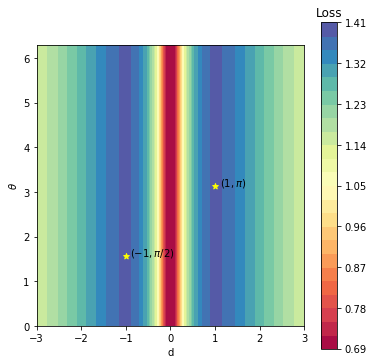

In [4]:
x = np.linspace(low_2, high_2, step)
y = np.linspace(low_1, high_1, step)
X,Y = np.meshgrid(x,y)
Z = np.array(mylosses)


fig, ax = plt.subplots(figsize=(6,6))


ax.set_aspect('equal')
ax.set_xlabel('d')
ax.set_ylabel(r'$\theta$')
cf = ax.contourf(X,Y,Z, 25, cmap='Spectral')
clb = fig.colorbar(cf, ax=ax)
clb.ax.set_title('Loss')
plt.scatter([1, -1], [np.pi, 0.5*np.pi], marker='*', c='yellow')
ax.annotate(r'$(1, \pi)$', xy=(1.1, np.pi))
ax.annotate(r'$(-1, \pi/2)$', xy=(-0.9, np.pi*0.5))
#plt.savefig('6O2d-tsymm.pdf')

In [56]:
#d, r plane

N = 10**3
e = 10**-7
generator = np.random.default_rng()
xx = generator.multivariate_normal(mu, sigma, N)
high_1 = 3
low_1 = 0.1
high_2 = 3
low_2 = -3
t = 0
u = 0
a = 1
b = 1
step = 30

mylosses= np.zeros((step, step))
i = 0
for r in np.linspace(low_1, high_1,step):
    losses = np.zeros(step)
    j = 0
    for d in np.linspace(low_2, high_2, step):
        yy = g(d, t, r, u, a, b, xx)
        losses[j] = np.mean(-np.log(e+h(d, t, r, u, a, b, xx)) - np.log(e+1.-h(d, t, r, u, a, b, yy)))
        j += 1
    mylosses[i] = losses
    i += 1

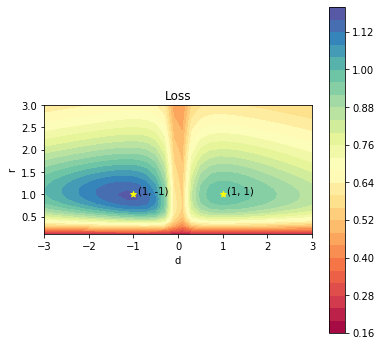

In [57]:
x = np.linspace(low_2, high_2, step)
y = np.linspace(low_1, high_1, step)
X,Y = np.meshgrid(x,y)
Z = np.array(mylosses)


fig, ax = plt.subplots(figsize=(6,6))


ax.set_aspect('equal')
ax.set_xlabel('d')
ax.set_ylabel('r')
cf = ax.contourf(X,Y,Z, 25, cmap='Spectral')
fig.colorbar(cf, ax=ax)
plt.title('Loss')
plt.scatter([1, -1], [1, 1], marker='*', c='yellow')
ax.annotate('(1, 1)', xy=(1.1, 1))
ax.annotate('(1, -1)', xy=(-0.9, 1))

plt.show()

In [13]:
#d, u plane

N = 10**3
e = 10**-7
generator = np.random.default_rng()
xx = generator.multivariate_normal(mu, sigma, N)
high_1 = 3
low_1 = -3
high_2 = 3
low_2 = -3
t = 0
r = 1
a = 0
b = 0
step = 30

mylosses= np.zeros((step, step))
i = 0
for u in np.linspace(low_1, high_1,step):
    losses = np.zeros(step)
    j = 0
    for d in np.linspace(low_2, high_2, step):
        yy = g(d, t, r, u, a, b, xx)
        losses[j] = np.mean(-np.log(e+h(d, t, r, u, a, b, xx)) - np.log(e+1.-h(d, t, r, u, a, b, yy)))
        j += 1
    mylosses[i] = losses
    i += 1

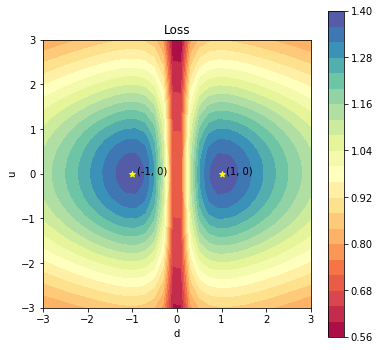

In [14]:
x = np.linspace(low_2, high_2, step)
y = np.linspace(low_1, high_1, step)
X,Y = np.meshgrid(x,y)
Z = np.array(mylosses)


fig, ax = plt.subplots(figsize=(6,6))


ax.set_aspect('equal')
ax.set_xlabel('d')
ax.set_ylabel('u')
cf = ax.contourf(X,Y,Z, 25, cmap='Spectral')
fig.colorbar(cf, ax=ax)
plt.title('Loss')
plt.scatter([1, -1], [0, 0], marker='*', c='yellow')
ax.annotate('(1, 0)', xy=(1.1, 0))
ax.annotate('(-1, 0)', xy=(-0.9, 0))

plt.show()

In [17]:
#t, r plane

N = 10**3
e = 10**-7
generator = np.random.default_rng()
xx = generator.multivariate_normal(mu, sigma, N)
high_1 = 3
low_1 = 0.1
high_2 = 2*np.pi+1
low_2 = 0
d = -1
u = 0
a = 1
b = 1
step = 30

mylosses= np.zeros((step, step))
i = 0
for r in np.linspace(low_1, high_1,step):
    losses = np.zeros(step)
    j = 0
    for t in np.linspace(low_2, high_2, step):
        yy = g(d, t, r, u, a, b, xx)
        losses[j] = np.mean(-np.log(e+h(d, t, r, u, a, b, xx)) - np.log(e+1.-h(d, t, r, u, a, b, yy)))
        j += 1
    mylosses[i] = losses
    i += 1

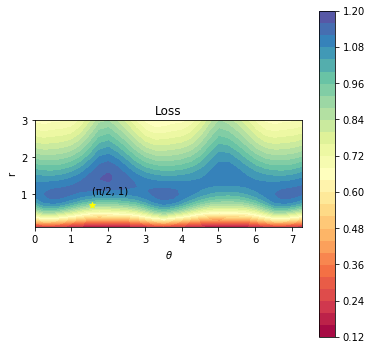

In [20]:
x = np.linspace(low_2, high_2, step)
y = np.linspace(low_1, high_1, step)
X,Y = np.meshgrid(x,y)
Z = np.array(mylosses)


fig, ax = plt.subplots(figsize=(6,6))


ax.set_aspect('equal')
ax.set_xlabel(r'$\theta$')
ax.set_ylabel('r')
cf = ax.contourf(X,Y,Z, 25, cmap='Spectral')
fig.colorbar(cf, ax=ax)
plt.title('Loss')
plt.scatter([np.pi/2], [1/np.sqrt(2)], marker='*', c='yellow')
ax.annotate('(π/2, 1)', xy=(np.pi/2, 1))
plt.show()

In [69]:
#t, u plane

N = 10**3
e = 10**-7
generator = np.random.default_rng()
xx = generator.multivariate_normal(mu, sigma, N)
high_1 = 3
low_1 = -3
high_2 = 2*np.pi
low_2 = 0
d = -1
r = 1
a = 1
b = 1
step = 30

mylosses= np.zeros((step, step))
i = 0
for u in np.linspace(low_1, high_1,step):
    losses = np.zeros(step)
    j = 0
    for t in np.linspace(low_2, high_2, step):
        yy = g(d, t, r, u, a, b, xx)
        losses[j] = np.mean(-np.log(e+h(d, t, r, u, a, b, xx)) - np.log(e+1.-h(d, t, r, u, a, b, yy)))
        j += 1
    mylosses[i] = losses
    i += 1

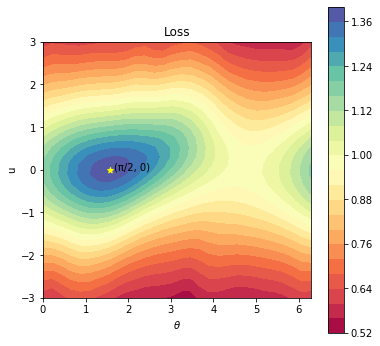

In [71]:
x = np.linspace(low_2, high_2, step)
y = np.linspace(low_1, high_1, step)
X,Y = np.meshgrid(x,y)
Z = np.array(mylosses)


fig, ax = plt.subplots(figsize=(6,6))


ax.set_aspect('equal')
ax.set_xlabel(r'$\theta$')
ax.set_ylabel('u')
cf = ax.contourf(X,Y,Z, 25, cmap='Spectral')
fig.colorbar(cf, ax=ax)
plt.title('Loss')
plt.scatter([np.pi/2], [0], marker='*', c='yellow')
ax.annotate('(π/2, 0)', xy=(np.pi/2+0.1, 0))
plt.show()

In [74]:
#r, u plane

N = 10**3
e = 10**-7
generator = np.random.default_rng()
xx = generator.multivariate_normal(mu, sigma, N)
high_1 = 3
low_1 = -3
high_2 = 3
low_2 = 0.1
d = 1
t = np.pi
a = 1
b = 1
step = 30

mylosses= np.zeros((step, step))
i = 0
for u in np.linspace(low_1, high_1,step):
    losses = np.zeros(step)
    j = 0
    for r in np.linspace(low_2, high_2, step):
        yy = g(d, t, r, u, a, b, xx)
        losses[j] = np.mean(-np.log(e+h(d, t, r, u, a, b, xx)) - np.log(e+1.-h(d, t, r, u, a, b, yy)))
        j += 1
    mylosses[i] = losses
    i += 1

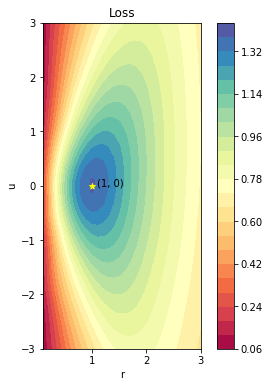

In [75]:
x = np.linspace(low_2, high_2, step)
y = np.linspace(low_1, high_1, step)
X,Y = np.meshgrid(x,y)
Z = np.array(mylosses)


fig, ax = plt.subplots(figsize=(6,6))


ax.set_aspect('equal')
ax.set_xlabel('r')
ax.set_ylabel('u')
cf = ax.contourf(X,Y,Z, 25, cmap='Spectral')
fig.colorbar(cf, ax=ax)
plt.title('Loss')
plt.scatter([1], [0], marker='*', c='yellow')
ax.annotate('(1, 0)', xy=(1.1, 0))

plt.show()

In [15]:
#a, b plane

N = 10**3
e = 10**-7
generator = np.random.default_rng()
xx = generator.multivariate_normal(mu, sigma, N)
low_1 = -3
high_1 = 3
low_2 = -3
high_2 = 3
d = -1
t = np.pi
r = 1
u = 0
step = 30

mylosses= np.zeros((step, step))
i = 0
for b in np.linspace(low_1, high_1,step):
    losses = np.zeros(step)
    j = 0
    for a in np.linspace(low_2, high_2, step):
        yy = g(d, t, r, u, a, b, xx)
        losses[j] = np.mean(-np.log(e+h(d, t, r, u, a, b, xx)) - np.log(e+1.-h(d, t, r, u, a, b, yy)))
        j += 1
    mylosses[i] = losses
    i += 1

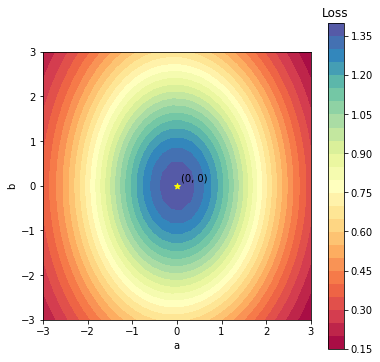

In [16]:
x = np.linspace(low_2, high_2, step)
y = np.linspace(low_1, high_1, step)
X,Y = np.meshgrid(x,y)
Z = np.array(mylosses)


fig, ax = plt.subplots(figsize=(6,6))


ax.set_aspect('equal')
ax.set_xlabel('a')
ax.set_ylabel('b')
cf = ax.contourf(X,Y,Z, 25, cmap='Spectral')
clb = fig.colorbar(cf, ax=ax)
clb.ax.set_title('Loss')
plt.scatter([0], [0], marker='*', c='yellow')
ax.annotate('(0, 0)', xy=(0.1, 0.1))
plt.savefig("6GL2asymmAB.pdf")

In [14]:
#t, a plane

N = 10**3
e = 10**-7
generator = np.random.default_rng()
xx = generator.multivariate_normal(mu, sigma, N)
low_1 = -3
high_1 = 3
low_2 = 0
high_2 = np.pi*2
d = -1
r = 1
u = 0
b = 1
step = 30

mylosses= np.zeros((step, step))
i = 0
for a in np.linspace(low_1, high_1,step):
    losses = np.zeros(step)
    j = 0
    for t in np.linspace(low_2, high_2, step):
        yy = g(d, t, r, u, a, b, xx)
        losses[j] = np.mean(-np.log(e+h(d, t, r, u, a, b, xx)) - np.log(e+1.-h(d, t, r, u, a, b, yy)))
        j += 1
    mylosses[i] = losses
    i += 1

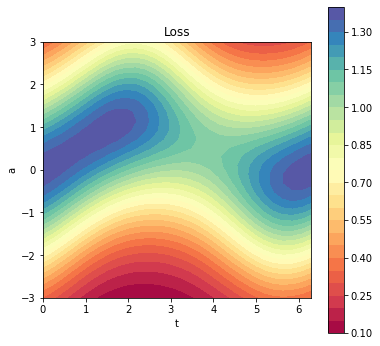

In [15]:
x = np.linspace(low_2, high_2, step)
y = np.linspace(low_1, high_1, step)
X,Y = np.meshgrid(x,y)
Z = np.array(mylosses)


fig, ax = plt.subplots(figsize=(6,6))


ax.set_aspect('equal')
ax.set_xlabel('t')
ax.set_ylabel('a')
cf = ax.contourf(X,Y,Z, 25, cmap='Spectral')
fig.colorbar(cf, ax=ax)
plt.title('Loss')

plt.show()